# Goal: Plot distribution of allele frequency of all mutated samples with methylation data then plot distribution of methylation ratios of samples with mutation data

In [1]:
import os
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Mutation data

In [ ]:
ICGC_SAMPLE_ID = 'SA320824' #Sample we are reading
DIRECTORY = 'E:/Sequencing/intersect/mutation/'
mu_df = pd.read_csv(DIRECTORY + ICGC_SAMPLE_ID + '.tsv', sep = '\t', low_memory=False)

In [ ]:
mu_df.head() #NEW-TEST SHAPE: (2477, 15)
            #NEW SHAPE (13098, 15)

In [ ]:
np_test = mu_df['frequency_mutated'].to_numpy(dtype = 'float64')

In [ ]:
np_test = np.concatenate([np_test, mu_df['frequency_mutated']])
np_test.shape

### Adding frequency_mutated column

In [ ]:
for file in os.listdir(DIRECTORY):
    print("WORKING ON {}".format(file))
    frequency_mutated = []
    df = pd.read_csv(DIRECTORY + file, sep = '\t', low_memory=False)
    for i in range(0, len(df)):
        frequency_mutated.append(df['mutant_allele_read_count'].iloc[i] / df['total_read_count'].iloc[i])
    df['frequency_mutated'] = frequency_mutated
    df.to_csv(DIRECTORY + file, sep='\t')
    print("DONE WITH {}".format(file))
print("DONE")

### Plotting distribution

In [ ]:
chart = sns.distplot(df['frequency_mutated'],\
                     kde = False, norm_hist = False, bins = 5,\
                     hist_kws=dict(edgecolor="black", linewidth=2),\
                     color = 'white').set_title("Freq. of Variant Allele Fraction for Sample {}".format(ICGC_SAMPLE_ID))
sns.despine()
plt.ylabel('Frequency')
plt.xlabel('VAF (Variant Allele Fraction)')
plt.show(chart)

In [ ]:
sns.set()

In [ ]:
cols = ['frequency_mutated']
for file in os.listdir(DIRECTORY):
    print("WORKING ON {}".format(file))
    df = pd.read_csv(DIRECTORY + file, sep = '\t', low_memory=False, usecols = cols)
    plt.clf()
    chart = sns.distplot(df['frequency_mutated'],\
                     kde = False, norm_hist = False, bins = 5,\
                     hist_kws=dict(edgecolor="black", linewidth=2),\
                     color = 'white').set_title("Freq. of Variant Allele Fraction for Sample {}".format(os.path.splitext(file)[0])) #Create histogram
    sns.despine()
    plt.ylabel('Frequency')
    plt.xlabel('VAF (Variant Allele Fraction)') 
    plt.savefig('{}.pdf'.format(os.path.splitext(file)[0]), dpi=300) #Save histogram to pdf
    print("DONE WITH {}".format(file))
print("DONE")

### Chart for all MALY mutation data combined

In [ ]:
count = 0
cols = ['frequency_mutated']
for file in os.listdir(DIRECTORY):
    print("WORKING ON {}".format(file))
    df = pd.read_csv(DIRECTORY + file, sep = '\t', low_memory=False, usecols = cols)
    if count > 0:
        np_ = np.concatenate([np_, df['frequency_mutated'].to_numpy(dtype = np.float64)])
    else:
        np_ = df['frequency_mutated'].to_numpy(dtype = np.float64)
    count += 1
    

In [ ]:
plt.clf()
chart = sns.distplot(np_,\
                     kde = False, norm_hist = False, bins = 5,\
                     hist_kws=dict(edgecolor="black", linewidth=2),\
                     color = 'white').set_title("Freq. of Variant Allele Fraction for all samples") #Create histogram
sns.despine()
plt.ylabel('Frequency')
plt.xlabel('VAF (Variant Allele Fraction)') 
plt.savefig('mutation_merged_untouched_rows.pdf', dpi=300) #Save histogram to pdf

In [ ]:
np_.shape

## Methylation Data

In [ ]:
sns.set()

In [ ]:
DIRECTORY = 'E:/Sequencing/intersect/methylation/'
cols = ['methylation_ratio']
for file in os.listdir(DIRECTORY):
    print("WORKING ON {}".format(file))
    df = pd.read_csv(DIRECTORY + file, sep = '\t', low_memory=False, usecols = cols)
    plt.clf()
    chart = sns.distplot(df['methylation_ratio'],\
                     kde = False, norm_hist = False, bins = 5,\
                     hist_kws=dict(edgecolor="black", linewidth=2),\
                     color = 'white').set_title("Freq. of Methylation Ratio for Sample {}".format(os.path.splitext(file)[0])) #Create histogram
    sns.despine()
    plt.ylabel('Frequency')
    plt.xlabel('Methylation Ratio') 
    plt.savefig('{}.pdf'.format(os.path.splitext(file)[0]), dpi=300) #Save histogram to pdf
    print("DONE WITH {}".format(file))
print("DONE")

In [2]:
count = 0
DIRECTORY = 'E:/Sequencing/intersect/methylation/'
cols = ['methylation_ratio']
for file in os.listdir(DIRECTORY):
    print("WORKING ON {}".format(file))
    df = pd.read_csv(DIRECTORY + file, sep = '\t', low_memory=False, usecols = cols)
    if count > 0:
        np_ = np.concatenate([np_, df['methylation_ratio'].to_numpy(dtype = np.float64)])
    else:
        np_ = df['methylation_ratio'].to_numpy(dtype = np.float64)
    count += 1
    

WORKING ON SA320818.tsv
WORKING ON SA320824.tsv
WORKING ON SA320830.tsv
WORKING ON SA320836.tsv
WORKING ON SA320842.tsv
WORKING ON SA320854.tsv
WORKING ON SA320860.tsv
WORKING ON SA320878.tsv
WORKING ON SA320890.tsv
WORKING ON SA320896.tsv
WORKING ON SA320920.tsv
WORKING ON SA320926.tsv
WORKING ON SA320932.tsv
WORKING ON SA320938.tsv
WORKING ON SA320944.tsv
WORKING ON SA320950.tsv
WORKING ON SA320962.tsv
WORKING ON SA320980.tsv
WORKING ON SA320992.tsv
WORKING ON SA320998.tsv
WORKING ON SA321004.tsv
WORKING ON SA321012.tsv


In [ ]:
df = pd.read_csv('E:/Sequencing/intersect/methylation/SA320818.tsv', sep = '\t', low_memory=False, usecols = cols)

In [ ]:
df.head()

In [3]:
np_.shape

(550904778,)

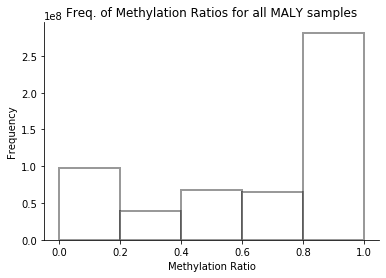

In [4]:
#Testing the charts
chart = sns.distplot(np_,\
                     kde = False, norm_hist = False, bins = 5,\
                     hist_kws=dict(edgecolor="black", linewidth=2),\
                     color = 'white').set_title("Freq. of Methylation Ratios for all MALY samples")
sns.despine()
plt.ylabel('Frequency')
plt.xlabel('Methylation Ratio')
plt.savefig('methylation_merged_untouched_rows.pdf', dpi=300) #Save histogram to pdf
plt.show(chart)